In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2

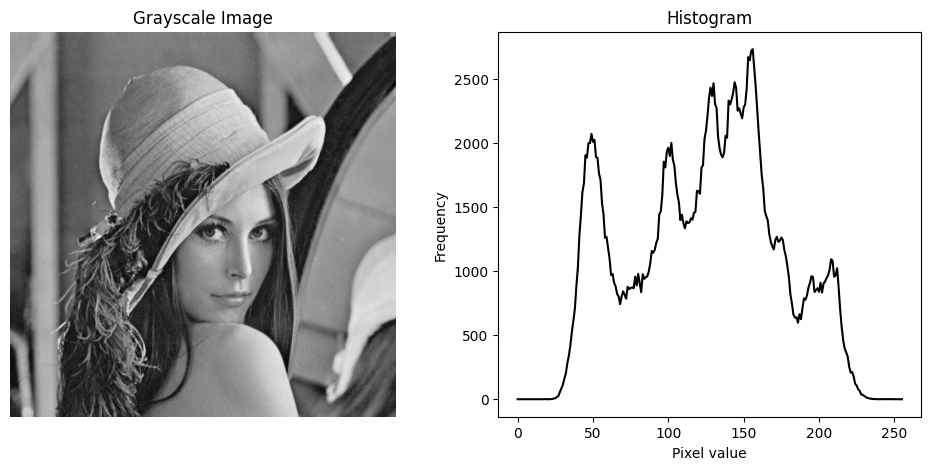

In [2]:
# 그레이스케일 이미지 읽기
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
else:
    # 히스토그램 계산 (256개 구간, 값 범위 0~255)
    hist = cv2.calcHist([src], [0], None, [256], [0, 256])

    # 원본 이미지와 히스토그램 표시
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.title('Grayscale Image')
    plt.imshow(src, cmap='gray')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title('Histogram')
    plt.plot(hist, color='black')
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')
    plt.show()

cv2.imread로 이미지를 그레이스케일로 불러오고, cv2.calcHist로 히스토그램을 계산합니다.

첫 번째 subplot에 원본 이미지를, 두 번째 subplot에 히스토그램을 그립니다.

코드의 그래프에서 frequency(빈도, y축)는 해당 밝기(픽셀값)가 이미지 내에서 몇 번 등장했는지를 의미합니다.

x축 (Pixel value) : 0~255 사이의 그레이스케일 픽셀값
0은 완전히 검은색, 255는 완전히 흰색을 의미합니다.

y축 (Frequency) :
해당 픽셀값(밝기)이 이미지 전체에서 나타난 픽셀의 개수입니다.
예를 들어, 128의 frequency가 500이라면, 이미지 내 128 밝기의 픽셀이 500개 있다는 뜻입니다.

히스토그램은 이미지의 밝기 분포를 한눈에 보여줍니다.
특정 밝기 값이 얼마나 많은지, 어두운/밝은 영역이 많은지 등을 분석할 수 있습니다.

즉, frequency는 "해당 밝기 값의 픽셀이 이미지에 몇 개 존재하는가"를 나타냅니다.

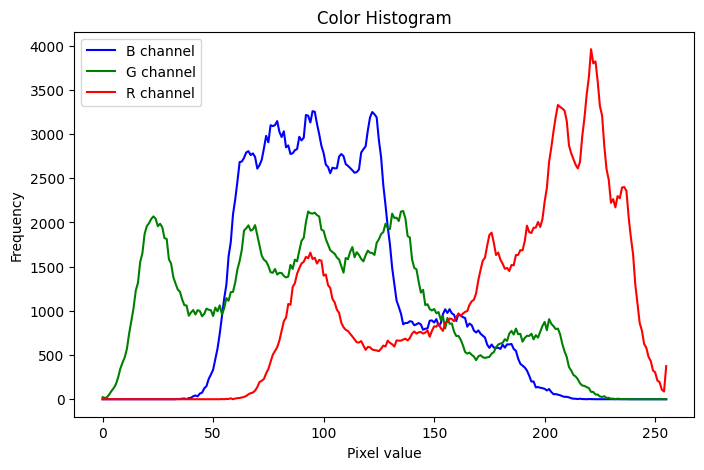

In [3]:
# 컬러 이미지 읽기
src = cv2.imread('lenna.bmp')

if src is None:
    print('Image load failed!')
else:
    # 컬러 채널 분리 (B, G, R)
    bgr_planes = cv2.split(src)
    colors = ['b', 'g', 'r']

    plt.figure(figsize=(8,5))
    for (p, c) in zip(bgr_planes, colors):
        hist = cv2.calcHist([p], [0], None, [256], [0, 256])
        plt.plot(hist, color=c, label=f'{c.upper()} channel')
    plt.title('Color Histogram')
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

이번에는 컬러 이미지를 불러와서 각 채널(B, G, R)별로 히스토그램을 계산하고,
채널별로 다른 색으로 히스토그램을 그립니다.

x축 (Pixel value): 0~255 사이의 색상 값 (각 채널의 밝기)
예: B 채널에서 0은 가장 어두운 파란색, 255는 가장 밝은 파란색

y축 (Frequency): 해당 채널에서 특정 픽셀값(밝기)이 이미지 전체에 몇 개 있는가(픽셀의 개수)

예를 들어, G 채널에서 픽셀값이 128인 frequency가 700이면, 이미지에서 G값이 128인 픽셀이 700개 있다는 뜻입니다.

# 히스토그램 분석이란?

이미지의 히스토그램은 각 픽셀 값(0~255)이 이미지에서 얼마나 자주 나타나는지 보여줍니다.
- **그레이스케일 히스토그램**: 밝기 분포(어두운/밝은 영역 비율 등)를 파악할 수 있습니다.
- **컬러 히스토그램**: 각 색상 채널별로 색 분포를 알 수 있어, 색상 보정이나 명암 조절 등에 활용됩니다.

실습을 통해, 영상의 특성을 파악하고 나중에 영상 처리(명암 조절, 이퀄라이즈 등)에 활용할 수 있습니다.

In [4]:
def getGrayHistImage(hist):
    imgHist = np.full((100, 256), 255, dtype=np.uint8)  # 바탕(흰색) 이미지 생성
    histMax = np.max(hist)  # 히스토그램에서 가장 큰 값(최대 빈도) 저장

    for x in range(256):
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x, 0] * 100 / histMax))
        # hist[x, 0]의 크기를 100픽셀 기준으로 정규화하여 선으로 그림
        cv2.line(imgHist, pt1, pt2, 0)  # 검은색(0)으로 선을 그림

    return imgHist

matplotlib 없이 OpenCV만으로 히스토그램을 시각화하는 함수입니다.
(빈도수에 따라 선의 길이를 조절해, 가로축에 픽셀값, 세로축에 빈도를 표현)

In [5]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)
if src is None:
    print('Image load failed!')
else:
    hist = cv2.calcHist([src], [0], None, [256], [0, 256])  # 히스토그램 계산
    histImg = getGrayHistImage(hist)  # 히스토그램 이미지 생성

이미지를 그레이스케일로 읽고, 픽셀값 분포를 나타내는 히스토그램을 구합니다.

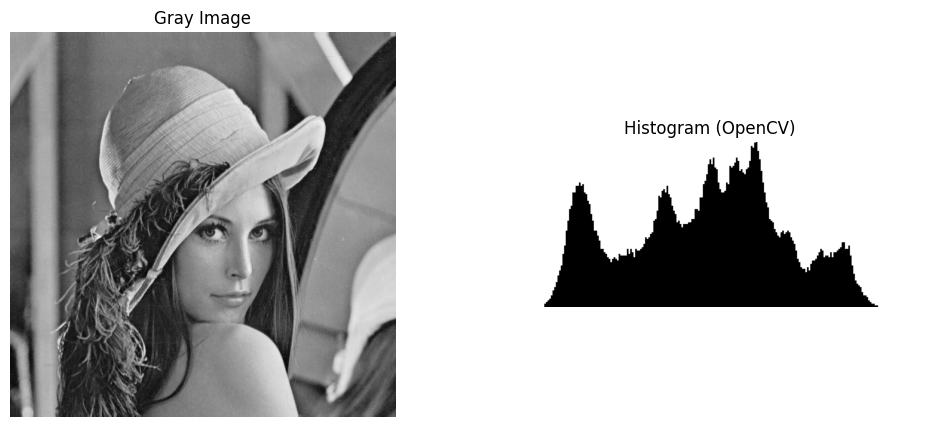

In [6]:
# 원본과 히스토그램 이미지를 나란히 출력
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Gray Image')
plt.imshow(src, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Histogram (OpenCV)')
plt.imshow(histImg, cmap='gray')
plt.axis('off')

plt.show()

왼쪽은 원본, 오른쪽은 OpenCV로 그린 히스토그램입니다.

# 히스토그램이란?
픽셀값의 빈도 분포를 나타내는 그래프로, 영상의 명암/밝기 특성을 쉽게 파악할 수 있습니다.

- 히스토그램을 보면 전체적으로 밝은지, 어두운지, 특정 밝기 영역에 치우쳐 있는지 알 수 있습니다.
- 영상의 품질 개선(예: 명암 보정, 히스토그램 평활화 등)에도 활용됩니다.
- OpenCV로 직접 히스토그램을 그릴 수 있으며, 더 복잡한 시각화도 가능합니다.